In [ ]:
import pandas as pd
import joblib
df = pd.read_csv('/content/sample_data/df_with_anomaly_scores.csv')
df.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,M4,M5,M6,M7,M8,M9,isFraud,xgb_anomaly_score,lgbm_anomaly_score,catboost_anomaly_score
0,86400,68.5,W,13926,361.0,150.0,discover,142.0,credit,315.0,...,M2,F,T,Missing,Missing,Missing,0,0.054599,0.015184,0.030420
1,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,M0,T,T,Missing,Missing,Missing,0,0.047556,0.005007,0.060144
2,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,M0,F,F,F,F,F,0,0.008613,0.001075,0.002332
3,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,M0,T,F,Missing,Missing,Missing,0,0.002126,0.000308,0.003415
4,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,Missing,Missing,Missing,Missing,Missing,Missing,0,0.011782,0.000942,0.006027


Epoch 1/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9892 - loss: 0.0433 - val_accuracy: 0.9924 - val_loss: 0.0294
Epoch 2/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9926 - loss: 0.0301 - val_accuracy: 0.9927 - val_loss: 0.0295
Epoch 3/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9925 - loss: 0.0304 - val_accuracy: 0.9929 - val_loss: 0.0293
Epoch 4/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9926 - loss: 0.0295 - val_accuracy: 0.9929 - val_loss: 0.0286
Epoch 5/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9930 - loss: 0.0292 - val_accuracy: 0.9930 - val_loss: 0.0291
Epoch 6/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9929 - loss: 0.0292 - val_accuracy: 0.9930 - val_loss: 0.0294
Epoch 7/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9932 - loss: 0.0283 - val_accuracy: 0.9930 - val_loss: 0.0281
Epoch 8/30
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 

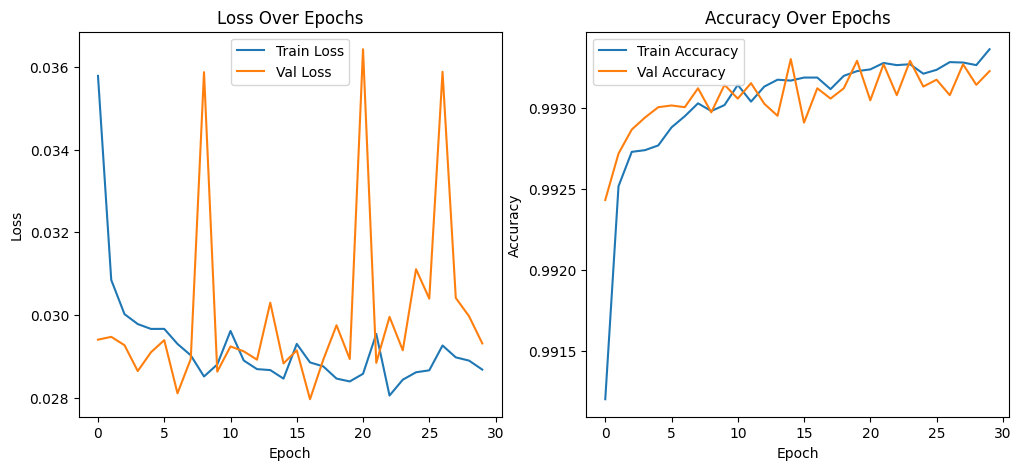

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Confusion Matrix:
[[113787    195]
 [   684   3442]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    113982
           1       0.95      0.83      0.89      4126

    accuracy                           0.99    118108
   macro avg       0.97      0.92      0.94    118108
weighted avg       0.99      0.99      0.99    118108



In [ ]:
# 📁 Notebook 1: OOF + Neural Network (Baseline)
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Define features and target
feature_cols = [col for col in df.columns if col not in ['isFraud']]
X = df[feature_cols].values
y = df['isFraud'].values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Shuffle and split dataset
X_scaled, y = shuffle(X_scaled, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/5
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.8984 - mae: 0.2200 - val_loss: 0.8448 - val_mae: 0.2038
Epoch 2/5
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.8436 - mae: 0.2034 - val_loss: 0.8442 - val_mae: 0.2028
Epoch 3/5
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 0.8608 - mae: 0.2030 - val_loss: 0.8439 - val_mae: 0.2024
Epoch 4/5
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 0.8735 - mae: 0.2026 - val_loss: 0.8435 - val_mae: 0.2017
Epoch 5/5
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 0.8633 - mae: 0.2022 - val_loss: 0.8435 - val_mae: 0.2018


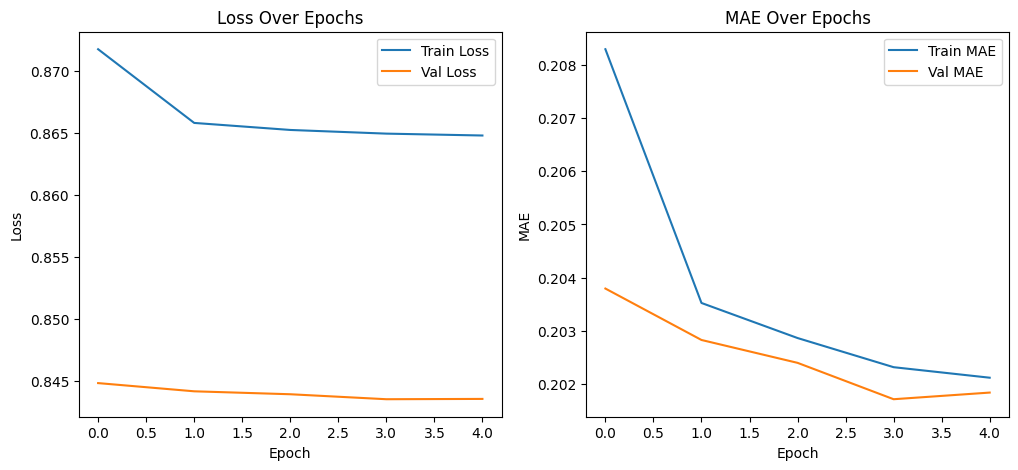

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Confusion Matrix:
[[108282   5584]
 [  3920    322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    113866
           1       0.05      0.08      0.06      4242

    accuracy                           0.92    118108
   macro avg       0.51      0.51      0.51    118108
weighted avg       0.93      0.92      0.93    118108



In [ ]:
# 📁 Notebook 2: Autoencoder
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Remove target label for unsupervised learning
y_true = df['isFraud'].values
X = df.drop(columns=['isFraud']).values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_true, test_size=0.2, random_state=42)

# Build Autoencoder
input_dim = X_train.shape[1]
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(64, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Autoencoder with history logging
history = autoencoder.fit(
    X_train, X_train,
    epochs=5,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test)
)

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Compute reconstruction error
X_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_pred, 2), axis=1)

# Threshold based on percentile
threshold = np.percentile(mse, 95)
y_pred = (mse > threshold).astype(int)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 178s 15ms/step - accuracy: 0.9851 - loss: 0.0636 - val_accuracy: 0.9904 - val_loss: 0.0376
Epoch 2/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 155s 13ms/step - accuracy: 0.9911 - loss: 0.0361 - val_accuracy: 0.9918 - val_loss: 0.0327
Epoch 3/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 160s 14ms/step - accuracy: 0.9922 - loss: 0.0319 - val_accuracy: 0.9923 - val_loss: 0.0316
Epoch 4/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 197s 13ms/step - accuracy: 0.9926 - loss: 0.0303 - val_accuracy: 0.9924 - val_loss: 0.0312
Epoch 5/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 203s 13ms/step - accuracy: 0.9927 - loss: 0.0302 - val_accuracy: 0.9926 - val_loss: 0.0301


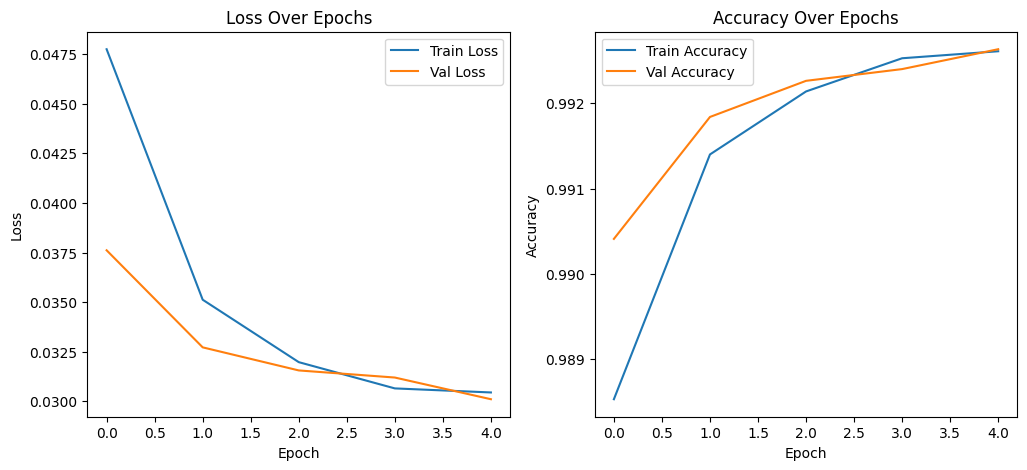

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step

Confusion Matrix:
[[113626    240]
 [   616   3626]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    113866
           1       0.94      0.85      0.89      4242

    accuracy                           0.99    118108
   macro avg       0.97      0.93      0.95    118108
weighted avg       0.99      0.99      0.99    118108



In [ ]:
# 📁 Notebook 3: CNN for Anomaly Detection
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and label
feature_cols = [col for col in df.columns if col not in ['isFraud']]
X = df[feature_cols].values
y = df['isFraud'].values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for CNN (samples, timesteps, features=1)
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Build CNN Model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate
preds = (model_cnn.predict(X_test) > 0.5).astype("int32")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 1951s 165ms/step - accuracy: 0.9652 - loss: 0.1505 - val_accuracy: 0.9650 - val_loss: 0.1405
Epoch 2/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 1915s 162ms/step - accuracy: 0.9656 - loss: 0.1373 - val_accuracy: 0.9650 - val_loss: 0.1398
Epoch 3/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 1880s 159ms/step - accuracy: 0.9652 - loss: 0.1375 - val_accuracy: 0.9650 - val_loss: 0.1384
Epoch 4/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 1872s 158ms/step - accuracy: 0.9683 - loss: 0.1228 - val_accuracy: 0.9908 - val_loss: 0.0397
Epoch 5/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 1895s 160ms/step - accuracy: 0.9904 - loss: 0.0396 - val_accuracy: 0.9672 - val_loss: 0.0767


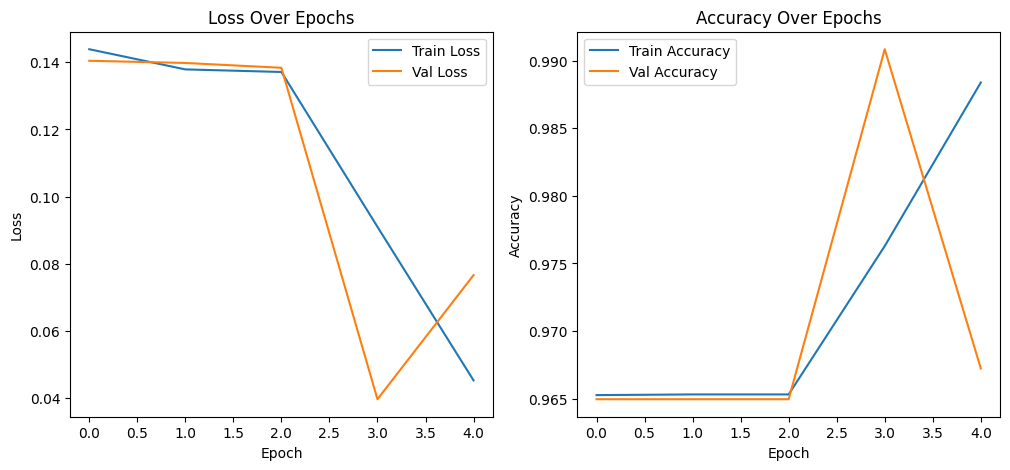

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 151s 41ms/step

Confusion Matrix:
[[113739    127]
 [  3840    402]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113866
           1       0.76      0.09      0.17      4242

    accuracy                           0.97    118108
   macro avg       0.86      0.55      0.58    118108
weighted avg       0.96      0.97      0.95    118108



In [ ]:
# 📁 Notebook 4: LSTM for Anomaly Detection
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and label
feature_cols = [col for col in df.columns if col not in ['isFraud']]
X = df[feature_cols].values
y = df['isFraud'].values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for LSTM (samples, timesteps, features=1)
X_lstm = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Build LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate
y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.5995 - val_loss: 0.4684
Epoch 2/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.4151 - val_loss: 0.4409
Epoch 3/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.4026 - val_loss: 0.4297
Epoch 4/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.3881 - val_loss: 0.4208
Epoch 5/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.3877 - val_loss: 0.4214


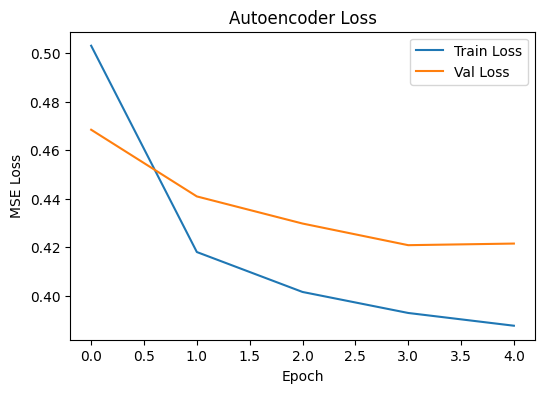

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Confusion Matrix:
[[108190   5676]
 [  4012    230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    113866
           1       0.04      0.05      0.05      4242

    accuracy                           0.92    118108
   macro avg       0.50      0.50      0.50    118108
weighted avg       0.93      0.92      0.92    118108



In [ ]:
# 📁 Notebook 5: Autoencoder for Anomaly Detection (autoendoder + isolation forest)
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and label
feature_cols = [col for col in df.columns if col not in ['isFraud']]
X = df[feature_cols].values
y = df['isFraud'].values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(64, activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(input_dim, activation='linear')(decoded)

autoencoder_iso = tf.keras.models.Model(inputs=input_layer, outputs=decoded)
autoencoder_iso.compile(optimizer='adam', loss='mse')

# Train Autoencoder
history = autoencoder_iso.fit(X_train, X_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot Training Loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Get reconstruction errors
X_test_pred = autoencoder_iso.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)

# Set threshold and predict
threshold = np.percentile(reconstruction_error, 95)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9875 - loss: 0.0430 - val_accuracy: 0.9923 - val_loss: 0.0328
Epoch 2/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9927 - loss: 0.0285 - val_accuracy: 0.9926 - val_loss: 0.0334
Epoch 3/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9931 - loss: 0.0277 - val_accuracy: 0.9927 - val_loss: 0.0314
Epoch 4/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9930 - loss: 0.0276 - val_accuracy: 0.9923 - val_loss: 0.0340
Epoch 5/5
11811/11811 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9931 - loss: 0.0268 - val_accuracy: 0.9927 - val_loss: 0.0305


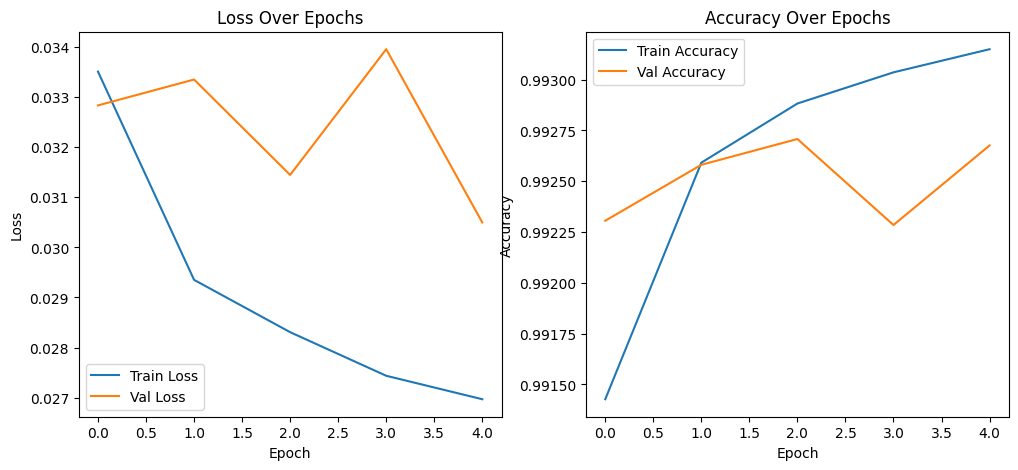

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step

Confusion Matrix:
[[113572    294]
 [   554   3688]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113866
           1       0.93      0.87      0.90      4242

    accuracy                           0.99    118108
   macro avg       0.96      0.93      0.95    118108
weighted avg       0.99      0.99      0.99    118108



In [ ]:
# 📁 Notebook 6: Ensemble Neural Network for Anomaly Detection
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and label
feature_cols = [col for col in df.columns if col not in ['isFraud']]
X = df[feature_cols].values
y = df['isFraud'].values

# Standardize features
# Ensure all columns are numeric
X = pd.get_dummies(df[feature_cols], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define submodels
input_layer = tf.keras.Input(shape=(X_train.shape[1],))

# Branch 1 - Dense Path
branch1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
branch1 = tf.keras.layers.Dropout(0.3)(branch1)

# Branch 2 - LSTM-like Feature Simulation via Dense
branch2 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
branch2 = tf.keras.layers.Dense(64, activation='relu')(branch2)

# Branch 3 - Autoencoder-style Compression
branch3 = tf.keras.layers.Dense(32, activation='relu')(input_layer)
branch3 = tf.keras.layers.Dense(64, activation='relu')(branch3)

# Merge branches
merged = tf.keras.layers.concatenate([branch1, branch2, branch3])
merged = tf.keras.layers.Dense(64, activation='relu')(merged)
output = tf.keras.layers.Dense(1, activation='sigmoid')(merged)

# Compile model
ensemble_model = tf.keras.Model(inputs=input_layer, outputs=output)
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = ensemble_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate
y_pred = (ensemble_model.predict(X_test) > 0.5).astype("int32")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
model.save("/dev/model.keras")
joblib.dump(scaler, "/dev/model.pkl")

['/dev/model.pkl']

In [ ]:
model.save("/dev/autoencoder.keras")
joblib.dump(scaler, "/dev/autoencoder.pkl")

from google.colab import drive
import joblib

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Save Keras model
model.save('/content/drive/MyDrive/autoencoder.keras')  # or .keras

# 3. Save Scaler using joblib
joblib.dump(scaler, '/content/drive/MyDrive/autoencoder.pkl')

print("✅ Model and scaler saved to your Google Drive!")



Mounted at /content/drive
✅ Model and scaler saved to your Google Drive!


In [ ]:
model.save("/dev/model_cnn.keras")
joblib.dump(scaler, "/dev/model_cnn.pkl")

# 2. Save Keras model
model.save('/content/drive/MyDrive/model_cnn.keras')  # or .keras

# 3. Save Scaler using joblib
joblib.dump(scaler, '/content/drive/MyDrive/model_cnn.pkl')

print("✅ Model and scaler saved to your Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model and scaler saved to your Google Drive!


In [ ]:
model.save("/dev/model_lstm.keras")
joblib.dump(scaler, "/dev/model_lstm.pkl")

model.save('/content/drive/MyDrive/model_lstm.keras')  # or .keras

# 3. Save Scaler using joblib
joblib.dump(scaler, '/content/drive/MyDrive/model_lstm.pkl')

print("✅ Model and scaler saved to your Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model and scaler saved to your Google Drive!


In [ ]:
model.save("/dev/autoencoder_iso.keras")
joblib.dump(scaler, "/dev/autoencoder_iso.pkl")

# 2. Save Keras model
model.save('/content/drive/MyDrive/autoencoder_iso.keras')  # or .keras

# 3. Save Scaler using joblib
joblib.dump(scaler, '/content/drive/MyDrive/autoencoder_iso.pkl')

print("✅ Model and scaler saved to your Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model and scaler saved to your Google Drive!


In [ ]:
model.save("/dev/ensemble_model.keras")
joblib.dump(scaler, "/dev/ensemble_model.pkl")

model.save('/content/drive/MyDrive/ensemble_model.keras')  # or .keras

# 3. Save Scaler using joblib
joblib.dump(scaler, '/content/drive/MyDrive/ensemble_model.pkl')

print("✅ Model and scaler saved to your Google Drive!")


✅ Model and scaler saved to your Google Drive!
